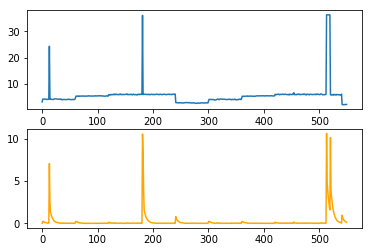

In [1]:
from luminol.anomaly_detector import AnomalyDetector
from datetime import datetime
import pandas as pd
import time
import matplotlib.pyplot as plt

coloumn_no_1 = 0
coloumn_no_2 = 2
df = pd.read_excel('luminol_data.xlsx')
#df = pd.read_excel('str_decomposition.xlsx')
series_1 = []
series_2 = []
for i in range(len(df)):
    dt = datetime.strptime((df.iloc[i,coloumn_no_1]), '%Y-%m-%dT%H:%M:%S.%fZ')
    series_1.append(int(time.mktime(dt.timetuple())))
    series_2.append(df.iloc[i,coloumn_no_2])
ts = dict(zip(series_1, series_2))
my_detector = AnomalyDetector(ts)
score = my_detector.get_all_scores()
anom_score = []

for (timestamp, value) in score.iteritems():
    t_str = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(timestamp))
    anom_score.append([t_str, value])

tmp_lst =[]
for score in anom_score:
    #print score
    tmp_lst.append(score[1])

#plt.plot(series_2)
#plt.plot(tmp_lst)
#plt.show()

plt.subplot(2, 1, 1)
plt.plot(series_2)

plt.subplot(2, 1, 2)
plt.plot(tmp_lst, color = 'orange')

plt.show()